## Reshape RGB Image to Square

This is the technique to square image by adding white borders to fill the empty spaces.

In [1]:
import cv2 
import os
from matplotlib import pyplot as plt 
import numpy as np
import math

#### Define the image path

In [2]:
filepath = os.path.join('.', 'images', 'ISIC_0024306.jpg')
filename = os.path.basename(filepath).split('.')[0]

filename

'ISIC_0024306'

#### Read image

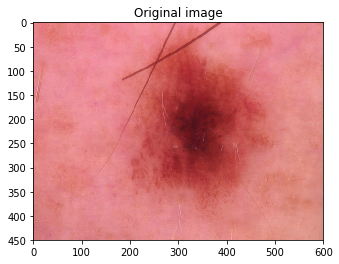

In [3]:
im = cv2.imread(filepath)
[height, width, channel] = im.shape

plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Original image')
plt.show()

#### Create blank square matrix using the largest dimension

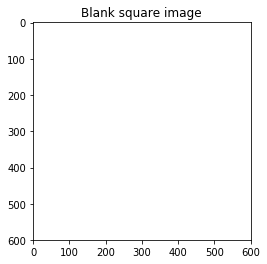

In [4]:
new_size = max(height, width)
square_im = np.empty((new_size,new_size,channel), np.uint8)
square_im[:,:] = (255,255,255)

plt.imshow(square_im)
plt.title('Blank square image')
plt.show()

#### Calculate the size of border

In [5]:
x_offset = math.floor((new_size-width)/2)
y_offset = math.floor((new_size-height)/2)

[x_offset, y_offset]

[0, 75]

#### Copy content of original image to the blank square image

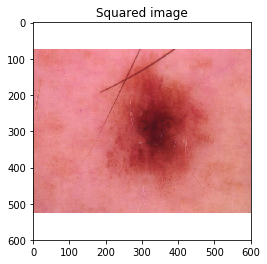

In [6]:
square_im[y_offset:y_offset+height, x_offset:x_offset+width] = im.copy()

plt.imshow(cv2.cvtColor(square_im, cv2.COLOR_BGR2RGB))
plt.title('Squared image')
plt.show()

#### Save squared image to chosen directory

In [7]:
save_dir = os.path.join('.', 'squared', filename+'.png')
cv2.imwrite(save_dir, square_im)

True

### Square image using loop for specific directory

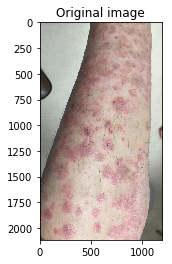

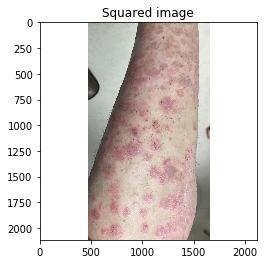

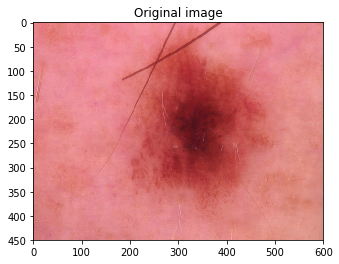

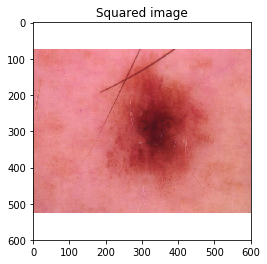

In [8]:
from glob import glob

images_dir = os.path.join('.', 'images')

for x in glob(os.path.join(images_dir, '*.jpg')):
    filepath = os.path.abspath(x)
    filename = os.path.basename(x).split('.')[0]
    
    im = cv2.imread(filepath)
    [height, width, channel] = im.shape
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title('Original image')
    plt.show()
    
    new_size = max(height, width)
    square_im = np.empty((new_size,new_size,channel), np.uint8)
    square_im[:,:] = (255,255,255)
    
    x_offset = math.floor((new_size-width)/2)
    y_offset = math.floor((new_size-height)/2)

    square_im[y_offset:y_offset+height, x_offset:x_offset+width] = im.copy()
    plt.imshow(cv2.cvtColor(square_im, cv2.COLOR_BGR2RGB))
    plt.title('Squared image')
    plt.show()
    
    save_dir = os.path.join('.', 'squared', filename+'.png')
    cv2.imwrite(save_dir, square_im)